### Importación de datos



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [12]:
ingreso_tienda = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

print("Ingresos Tienda :", ingreso_tienda)
print("Ingresos Tienda 2:", ingreso_tienda2)
print("Ingresos Tienda 3:", ingreso_tienda3)
print("Ingresos Tienda 4:", ingreso_tienda4)

Ingresos Tienda : 1150880400.0
Ingresos Tienda 2: 1116343500.0
Ingresos Tienda 3: 1098019600.0
Ingresos Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [13]:
ventas_por_categoria_todas_tiendas = {}

tiendas = [
    (tienda, 'Tienda'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]

for store_df, nombre_tienda in tiendas:
    ventas_por_categoria = store_df.groupby("Categoría del Producto")["Precio"].count()
    ventas_por_categoria_todas_tiendas[nombre_tienda] = ventas_por_categoria

for nombre_tienda, info_ventas in ventas_por_categoria_todas_tiendas.items():
    print(f"{nombre_tienda} - ventas por categoría:")
    print(info_ventas)
    print()

Tienda - ventas por categoría:
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
Name: Precio, dtype: int64

Tienda 2 - ventas por categoría:
Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
Name: Precio, dtype: int64

Tienda 3 - ventas por categoría:
Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
Name: Precio, dtype: int64

Tienda

# 3. Calificación promedio de la tienda


In [14]:
promedios_calificacion = {}

tiendas = [
    (tienda, 'Tienda'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]

for df, nombre_tienda in tiendas:
    promedio_calif = df["Calificación"].mean()
    promedios_calificacion[nombre_tienda] = promedio_calif

for nombre_tienda, promedio in promedios_calificacion.items():
    print(f"{nombre_tienda} - Calificación promedio: {promedio:.2f}")

Tienda - Calificación promedio: 3.98
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.00


# 4. Productos más y menos vendidos

In [15]:
from collections import defaultdict

productos_top_bottom = defaultdict(dict)

tiendas = [
    (tienda, 'Tienda'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]

for df, nombre in tiendas:
    ventas_prod = df.groupby("Producto")["Precio"].count().sort_values(ascending=False)

    producto_mas_vendido = ventas_prod.idxmax()
    ventas_max = ventas_prod.max()

    producto_menos_vendido = ventas_prod.idxmin()
    ventas_min = ventas_prod.min()

    productos_top_bottom[nombre]["Más vendido"] = (producto_mas_vendido, ventas_max)
    productos_top_bottom[nombre]["Menos vendido"] = (producto_menos_vendido, ventas_min)

for tienda, info in productos_top_bottom.items():
    print(f"\n{tienda}:")
    print(f"  ✔ Producto más vendido:  {info['Más vendido'][0]} ({info['Más vendido'][1]} ventas)")
    print(f"  ✔ Producto menos vendido: {info['Menos vendido'][0]} ({info['Menos vendido'][1]} ventas)")


Tienda:
  ✔ Producto más vendido:  Armario (60 ventas)
  ✔ Producto menos vendido: Celular ABXY (33 ventas)

Tienda 2:
  ✔ Producto más vendido:  Iniciando en programación (65 ventas)
  ✔ Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
  ✔ Producto más vendido:  Kit de bancas (57 ventas)
  ✔ Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
  ✔ Producto más vendido:  Cama box (62 ventas)
  ✔ Producto menos vendido: Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

In [16]:
import pandas as pd

promedios_envio = {}

# Iterate over the 'tiendas' list, which contains (dataframe, name) tuples.
# The 'tiendas' variable was defined in a previous cell (A34YupIuYhfF).
for df_store, nombre_tienda in tiendas:
    promedio_envio = df_store["Costo de envío"].mean()
    promedios_envio[nombre_tienda] = promedio_envio

for nombre_tienda, promedio in promedios_envio.items():
    print(f"{nombre_tienda} - Costo de envío promedio: ${promedio:.2f}")

Tienda - Costo de envío promedio: $26018.61
Tienda 2 - Costo de envío promedio: $25216.24
Tienda 3 - Costo de envío promedio: $24805.68
Tienda 4 - Costo de envío promedio: $23459.46


In [17]:
pip install matplotlib

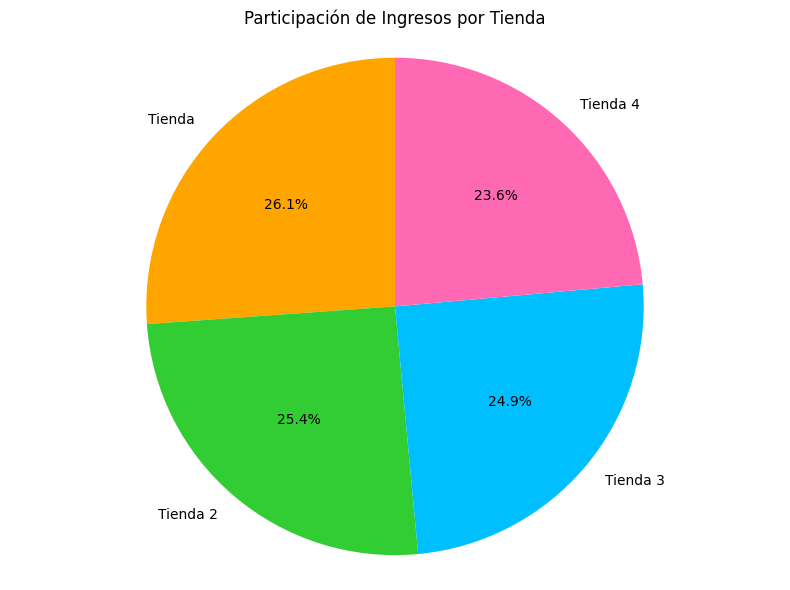

In [28]:
import matplotlib.pyplot as plt

colores_tiendas = {
    "Tienda": "#FFA500",    # naranja
    "Tienda 2": "#32CD32",  # verde
    "Tienda 3": "#00BFFF",  # celeste
    "Tienda 4": "#FF69B4"   # rosa
}

# Diccionario de ingresos (igual que antes)
ingresos = {}
for df_obj, store_name in tiendas:
    ingresos[store_name] = df_obj["Precio"].sum()

# Labels y valores
tiendas_nombres = list(ingresos.keys())
valores_ingresos = list(ingresos.values())
colores = [colores_tiendas[t] for t in tiendas_nombres]

plt.figure(figsize=(8, 6))

plt.pie(
    valores_ingresos,
    labels=tiendas_nombres,
    colors=colores,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Participación de Ingresos por Tienda")
plt.axis("equal")  # Hace el círculo perfecto
plt.tight_layout()
plt.show()


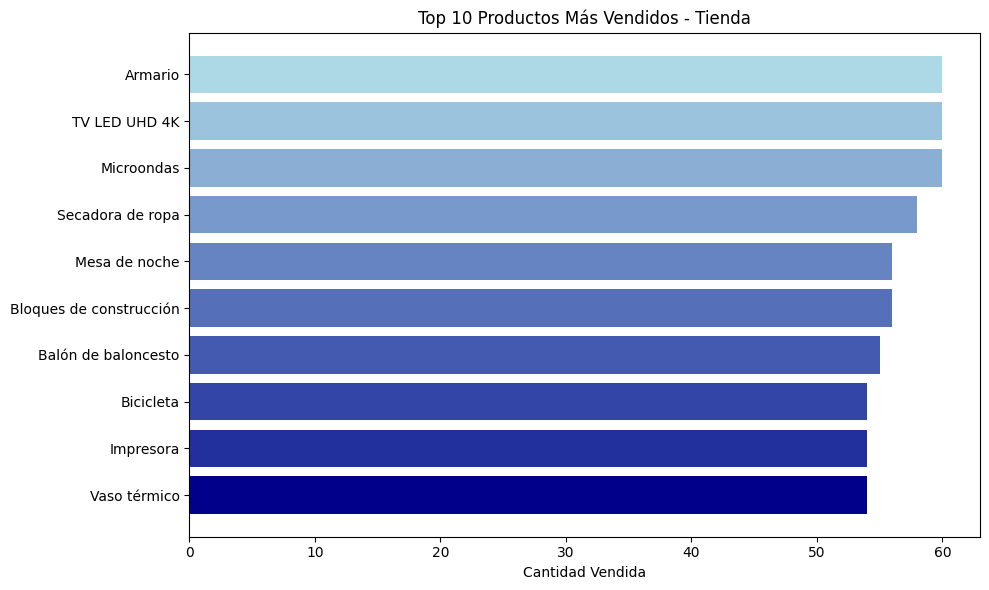

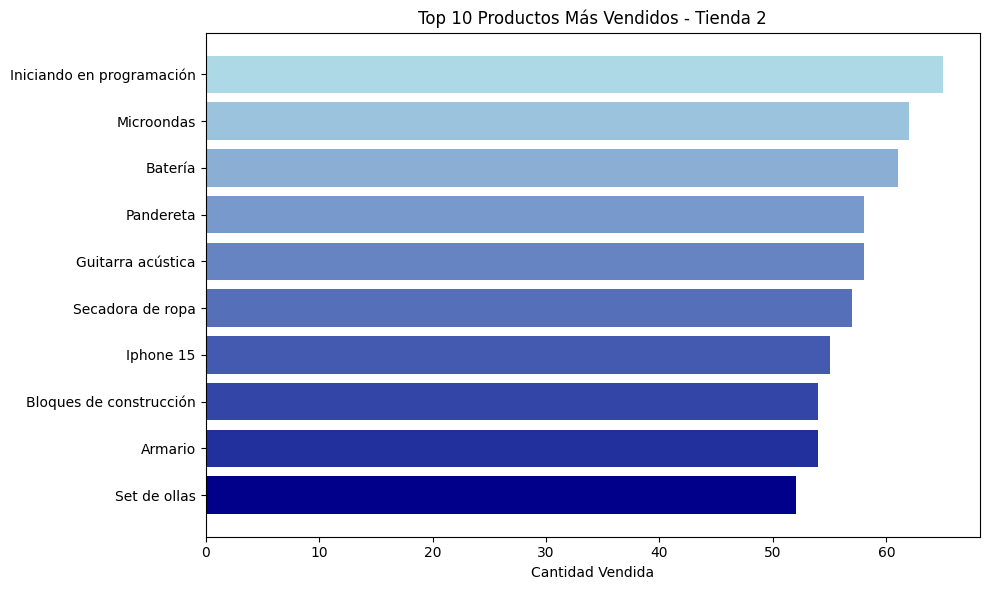

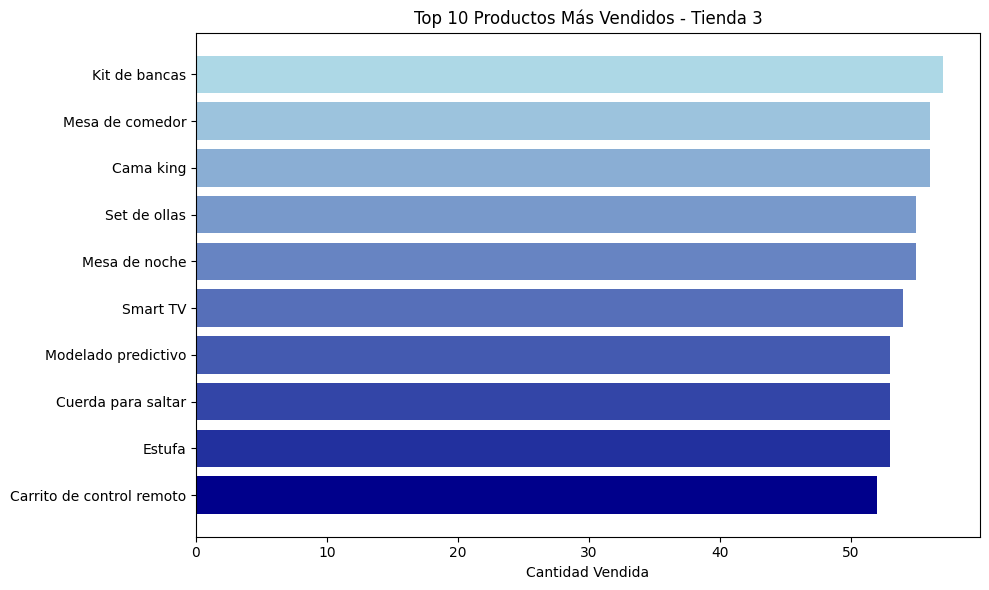

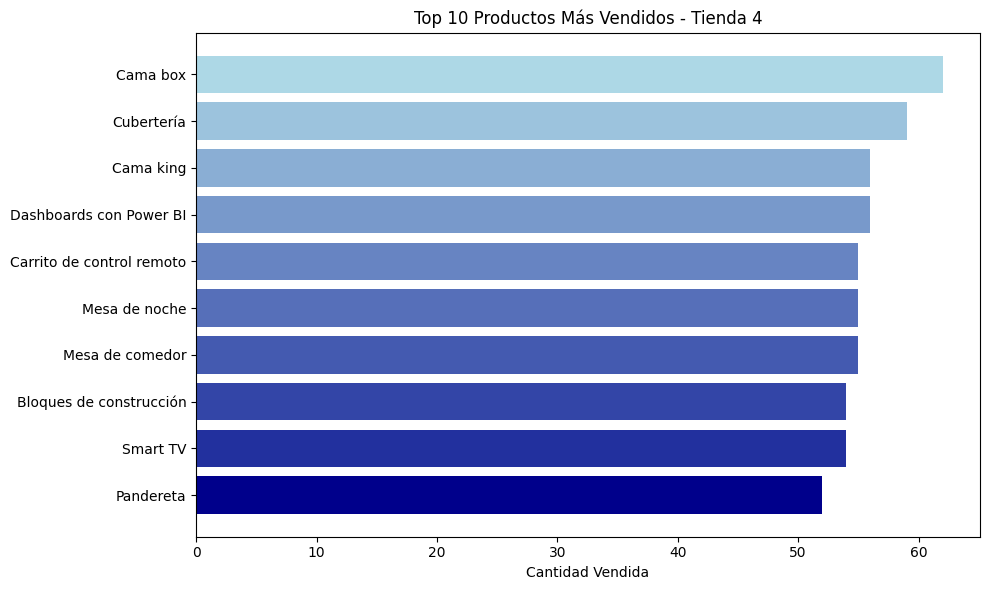

In [19]:
import numpy as np

# Gradiente de azul (claro → oscuro, 10 tonos)
gradiente_azul = [
    "#ADD8E6", "#9CC3DD", "#8AAED4", "#7899CB", "#6784C2",
    "#566FB9", "#445AB0", "#3345A7", "#22309E", "#00008B"
]

# The 'tiendas' variable was correctly defined in a previous cell (A34YupIuYhfF)
# and contains the DataFrame objects. We will use this instead of re-defining
# an incorrect 'tiendas_lista'.

for df, nombre in tiendas:
    ventas_prod = df.groupby("Producto")["Precio"].count().sort_values(ascending=False)
    top10 = ventas_prod.head(10)

    plt.figure(figsize=(10, 6))
    plt.barh(top10.index,
             top10.values,
             color=gradiente_azul[:len(top10)])  # aplica el gradiente

    plt.gca().invert_yaxis()  # El más vendido arriba
    plt.title(f"Top 10 Productos Más Vendidos - {nombre}")
    plt.xlabel("Cantidad Vendida")
    plt.tight_layout()
    plt.show()

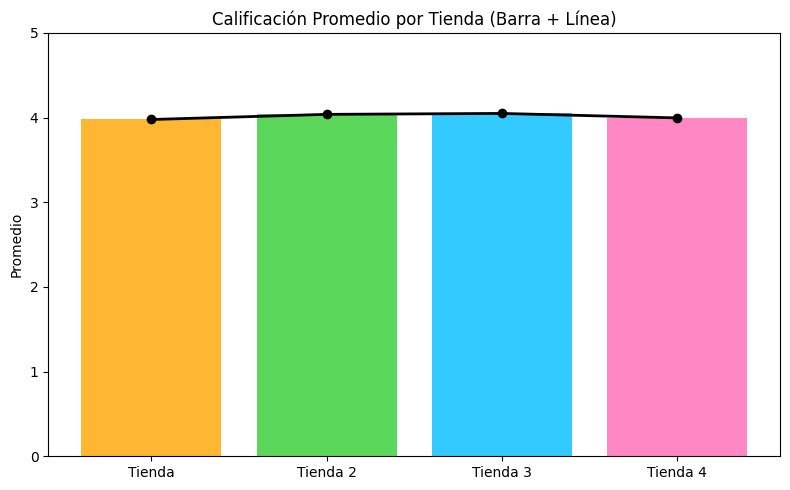

In [29]:
promedios = {}
for df, nombre_tienda in tiendas:
    promedios[nombre_tienda] = df["Calificación"].mean()

tiendas_nombres = list(promedios.keys())
valores_promedio = list(promedios.values())

plt.figure(figsize=(8, 5))


plt.bar(
    tiendas_nombres,
    valores_promedio,
    color=[colores_tiendas[t] for t in tiendas_nombres],
    alpha=0.8
)


plt.plot(
    tiendas_nombres,
    valores_promedio,
    marker="o",
    linewidth=2,
    color="black"
)

plt.title("Calificación Promedio por Tienda (Barra + Línea)")
plt.ylabel("Promedio")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

El objetivo de este análisis es ayudar al Sr. Juan a decidir cuál de sus tiendas debería cerrar.
Para ello se tomaron los siguientes datos clave del desempeño de cada tienda:

*  Ingresos totales

*  Categorías de productos más y menos vendidas

*  Calificaciones promedio de los clientes

*  Productos más y menos vendidos

*  Costo de envío promedio

Mi propósito con este informe es ofrecer una recomendación fundamentada, basada en datos objetivos y visualizaciones generadas durante el análisis.

Para tomar esta decisión tuve en cuenta las ventas y las calificaciones de cada una de las tiendas del Sr. Juan.
Viendo los gráficos, podemos observar que todas las tiendas tienen una gran reputación entre los compradores, pero se aprecia una clara dominancia de la Tienda 1 en comparación con las demás.
Si bien esta tiene un valor mayor de costos de envío, estos se ven directamente relacionados con la cantidad de productos vendidos.
Viendo las tendencias de los compradores, podemos notar que todas las tiendas siguen el mismo patrón en cuanto a las categorías más vendidas.
También podemos observar que todas tienen una gran apreciación por parte de los clientes.

Observamos que la Tienda 1 tiene un puntaje un poco menor que el resto y que la Tienda 4 tiene una apreciación ligeramente mayor que las demás. Esto se puede asociar nuevamente con el volumen de compradores, ya que al haber más instancias de venta se da lugar a un porcentaje mayor de accidentes o sucesos que pueden desanimar al comprador.

Siguiendo esta línea de pensamiento, podemos ver que el Sr. Juan es un gran emprendedor. Todas sus tiendas están en tendencia con los consumidores y gozan de grandes apreciaciones por parte de ellos.
Siendo este el caso, la tienda que debería venderse es la Tienda 4, ya que tiene la menor cantidad de ventas.